In [1]:
## imported simple json over json as it is faster
import simplejson as json
import pandas as pd
import timeit
import sys
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.dates as mdates
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from datetime import timezone,tzinfo
from dateutil.parser import parse

import pytz


In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [20,10]

In [3]:
input_file="gabai.0013.json"

## Reading line by line as:
* As the file has erros  
* only valid json objects need to be added ot the list, 
* The file is large so it saves memmory. 

In [4]:
%%time
ls=[]
with open(input_file) as f:
    for i,line in enumerate(f):
        try:
            c_line=json.loads(line)
            ls.append(c_line)
            if((i+1)%50000==0):
                print(i)
        except:
            print("Error at line number",i)       

49999
99999
149999
199999
249999
299999
349999
399999
449999
499999
549999
599999
649999
699999
749999
799999
849999
Error at line number 872991
Error at line number 872992
Error at line number 872993
Error at line number 872994
Error at line number 872995
Error at line number 872996
Error at line number 872997
Error at line number 872998
Error at line number 872999
Error at line number 873000
Error at line number 873001
Error at line number 873002
Error at line number 873003
Error at line number 873004
Error at line number 873005
Error at line number 873006
Error at line number 873007
Error at line number 873008
Error at line number 873009
Error at line number 873010
Error at line number 873011
Error at line number 873012
Error at line number 873013
Error at line number 873014
Error at line number 873015
Error at line number 873016
Error at line number 873017
Error at line number 873018
Error at line number 873019
Error at line number 873020
Error at line number 873021
Error at line n

# Inspecting Lines where error occured

In [5]:
%%time
with open(input_file) as f:
    lines = f.readlines()
for i in range(872991,873030):
    print(lines[i])

<br />

<b>Warning</b>:  require(/home/forge/gab.ai/bootstrap/../vendor/autoload.php): failed to open stream: No such file or directory in <b>/home/forge/gab.ai/bootstrap/autoload.php</b> on line <b>17</b><br />

<br />

<b>Fatal error</b>:  require(): Failed opening required '/home/forge/gab.ai/bootstrap/../vendor/autoload.php' (include_path='.:/usr/share/php') in <b>/home/forge/gab.ai/bootstrap/autoload.php</b> on line <b>17</b><br />



<br />

<b>Warning</b>:  require(/home/forge/gab.ai/bootstrap/../vendor/autoload.php): failed to open stream: No such file or directory in <b>/home/forge/gab.ai/bootstrap/autoload.php</b> on line <b>17</b><br />

<br />

<b>Fatal error</b>:  require(): Failed opening required '/home/forge/gab.ai/bootstrap/../vendor/autoload.php' (include_path='.:/usr/share/php') in <b>/home/forge/gab.ai/bootstrap/autoload.php</b> on line <b>17</b><br />



<br />

<b>Warning</b>:  require(/home/forge/gab.ai/bootstrap/../vendor/autoload.php): failed to open stream: No

### Missing Line Analysis
* Now, we have confirmed the fact that we have not missed any useful  message 
* Also tried  changing the range at random for more sanity checks

In [6]:
%%time
## loading the list into a dataframe now.
df=pd.DataFrame(ls)

CPU times: user 16.8 s, sys: 37.8 s, total: 54.7 s
Wall time: 1min 15s


###  How many messages/gabs are in this dataset?

In [7]:
print("Number of messages is", len(df.index))

Number of messages is 999992


In [8]:
## Explpring the user, we need to create a  new user column with the information of the curtrent dict.
df.loc[1].user

{'id': 189400,
 'is_donor': False,
 'is_investor': False,
 'is_premium': False,
 'is_private': False,
 'is_pro': False,
 'name': 'HenPre13',
 'picture_url': 'https://files.gab.ai/user/59392bee3268b.jpg',
 'username': 'Zwitscher',
 'verified': False}

In [9]:
%%time

##making a new data frame where we have expanded the user column and preffixxed the column name with user_
user_df = pd.concat([df.drop('user', axis=1), pd.DataFrame(df['user'].tolist()).add_prefix('user_')], axis=1)

CPU times: user 9.93 s, sys: 25.6 s, total: 35.6 s
Wall time: 47.8 s


### How many users authored messages are in this dataset?


In [10]:
## number of users
print("Number of users is", len(user_df['user_id'].unique()))

Number of users is 15973


###  What are the mean/median/max/min number of messages authored by a user?

In [11]:
### mean/median/max/min number of messages authored by a user
grouped_user_df = user_df.groupby(['user_id']).user_id.count()
print(" User  Message Stats:\n Mean: {} \n Median: {} \n Max: {} \n Min: {}".format( \
      grouped_user_df.mean(), grouped_user_df.median(), \
     grouped_user_df.max() , grouped_user_df.min())) 

 User  Message Stats:
 Mean: 62.60514618418581 
 Median: 4.0 
 Max: 13799 
 Min: 1


### List the 10 users with the most messages, and the number of messages each.


In [34]:
%%time
# top 10 users with messages
top10user_df_series = grouped_user_df.nlargest(10)
#search user id in user_df, 
print("Name\t\t\tUser_ID\tCount\n")
for x,y in top10user_df_series.iteritems():
    ### can be optimezed look into it
    c_index = (user_df.user_id.values == x).argmax()
    c_user_name = user_df.loc[c_index].user_name
    c_user_id=user_df.loc[c_index].user_id
    print('{:<25}{}\t{}'.format(c_user_name,c_user_id,y))
    


Name			User_ID	Count

Constitutional Drunk     64690	13799
EyeAm                    69650	5996
Ron MacDonald            100406	5471
#NSFW LeeLee             102726	4956
Jay                      169891	4842
Tipol J News             167852	4816
OpenQuotes 👌🐸            98146	4678
Dani                     105504	4594
bobofkake-Bro:)          29492	4404
Lea Morabito             77796	4230
CPU times: user 16.6 ms, sys: 4.98 ms, total: 21.6 ms
Wall time: 15.1 ms


## URL MINING

In [13]:
"""
the web url matching regex used by markdown
http://daringfireball.net/2010/07/improved_regex_for_matching_urls
https://gist.github.com/gruber/8891611
"""
URL_REGEX = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""


In [14]:
%%time

message_list= user_df['body'].tolist()
urls=[]
for message in message_list:
    a=re.findall(URL_REGEX,message.lower())
    urls.extend(a)

CPU times: user 40 s, sys: 1.46 s, total: 41.5 s
Wall time: 43.3 s


### 5 most common urls

In [15]:
url_counter=Counter(urls)
top_5_urls = url_counter.most_common(5)
print("URL  Count")
for url,count in top_5_urls:
    print(url,count)

URL  Count
gab.ai 880
mewe.com/join/lovehaswon 874
https://www.abgeordneten-check.de/kampagnen/stoppt-die-digitale-zensur/startseite/aktion/368383z13871/nc/1/ 441
military.com 384
kek.gg 323


### Text Mining for frequently occuring words

In [23]:
%%time 
all_words=[]

stop_words = set(line.strip() for line in open('stop_words.txt'))
stop_words.add("https")
stop_words.add("http")

for message in message_list:
    message = message.lower()
    tokens = word_tokenize(message)
    filtered_words = [w for w in tokens if not w in stop_words]
    
    alnum_words = [w for w in filtered_words if w.isalnum()]
    
    all_words.extend(alnum_words)
    
all_words_counter = Counter(all_words)


CPU times: user 5min 8s, sys: 4.67 s, total: 5min 12s
Wall time: 5min 22s


### 10 most common  words

In [25]:
top_10_words = all_words_counter.most_common(10)
print("Word\tFrequency")
for word,frequency in top_10_words:
    print ("{}\t{}".format(word,frequency))

Word	Frequency
die	53278
trump	47422
people	41539
der	36623
news	35665
und	35473
gabfam	28652
maga	27990
das	24876
ist	22695


### Date Message Plotting:
* Convert to correct time zone   
* Plot

In [26]:
%%time

### convert all the tweets to EST time zone as we have diff. time zones and then add dates
EST_tz = pytz.timezone('EST')
created_at_list= user_df['created_at'].tolist()
date_list =[]
for curr_dt_string in created_at_list:
    curr_dt   =  parse(curr_dt_string)
    
    ###converts all message to est time zone
    curr_date   = curr_dt.astimezone(EST_tz).date()
    date_list.append(curr_dt.date())
dates_counter = Counter(date_list)

CPU times: user 1min 46s, sys: 807 ms, total: 1min 46s
Wall time: 1min 47s


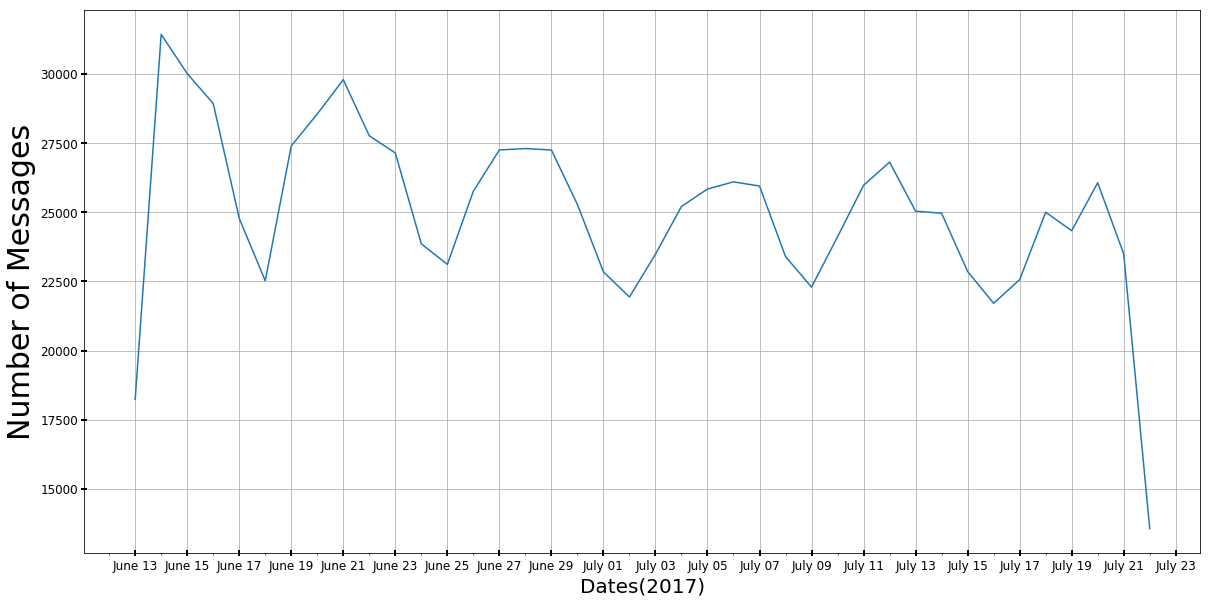

In [28]:
### plots date in the correct format
fig, ax = plt.subplots()
ax.plot_date(dates_counter.keys(),dates_counter.values(),'-')

ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B %d'))
ax.tick_params(labelsize=12,length=6, width=2,direction='inout')

ax.grid(True)
plt.xlabel('Dates(2017)', fontsize=20)
plt.ylabel('Number of Messages',fontsize=30)

plt.show()
